#### Reading the clean data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Read the CSV file containing real estate data into a pandas DataFrame
data = pd.read_csv('/content/data_RealEstateDataChicago.csv')

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings to keep the output clean

# Display a random sample of 5 rows from the DataFrame
# This helps in quickly inspecting the structure and content of the data
data.sample(5)

,type,beds,baths,garage,lot_sqft,sqft,stories,listPrice,age_range
456,1,3,3,1,3751.0,2170.0,39,549900.0,3
94,1,2,2,2,3751.0,950.0,3,260000.0,1
1282,4,6,2,2,3751.0,2349.0,2,375000.0,2
369,1,3,3,1,3751.0,1550.0,3,975000.0,0
1442,1,1,1,1,3751.0,785.0,26,165000.0,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1998 non-null   int64  
 1   beds       1998 non-null   int64  
 2   baths      1998 non-null   int64  
 3   garage     1998 non-null   int64  
 4   lot_sqft   1998 non-null   float64
 5   sqft       1998 non-null   float64
 6   stories    1998 non-null   int64  
 7   listPrice  1998 non-null   float64
 8   age_range  1998 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 140.6 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
type,1998.0,3.407908,1.903605e+00,0.0,1.00,5.0,5.0,6.0
beds,1998.0,3.193193,1.818702e+00,0.0,2.00,3.0,4.0,21.0
baths,1998.0,2.441942,1.454839e+00,0.0,2.00,2.0,3.0,13.0
garage,1998.0,2.026527,9.111164e+00,0.0,1.00,2.0,2.0,400.0
lot_sqft,1998.0,5433.124124,4.836378e+04,0.0,3750.00,3751.0,3751.0,2156000.0
sqft,1998.0,1881.536537,1.492463e+03,0.0,1216.25,1550.0,2000.0,25000.0
stories,1998.0,6.145145,1.193791e+01,0.0,2.00,2.0,3.0,119.0
listPrice,1998.0,600872.606106,1.201199e+06,0.0,225000.00,349900.0,575000.0,23500000.0
age_range,1998.0,2.127628,1.584928e+00,0.0,1.00,2.0,4.0,4.0


In [ ]:
data.isnull().sum()

,0
type,0
beds,0
baths,0
garage,0
lot_sqft,0
sqft,0
stories,0
listPrice,0
age_range,0


##### Visualizing the data

<Axes: >

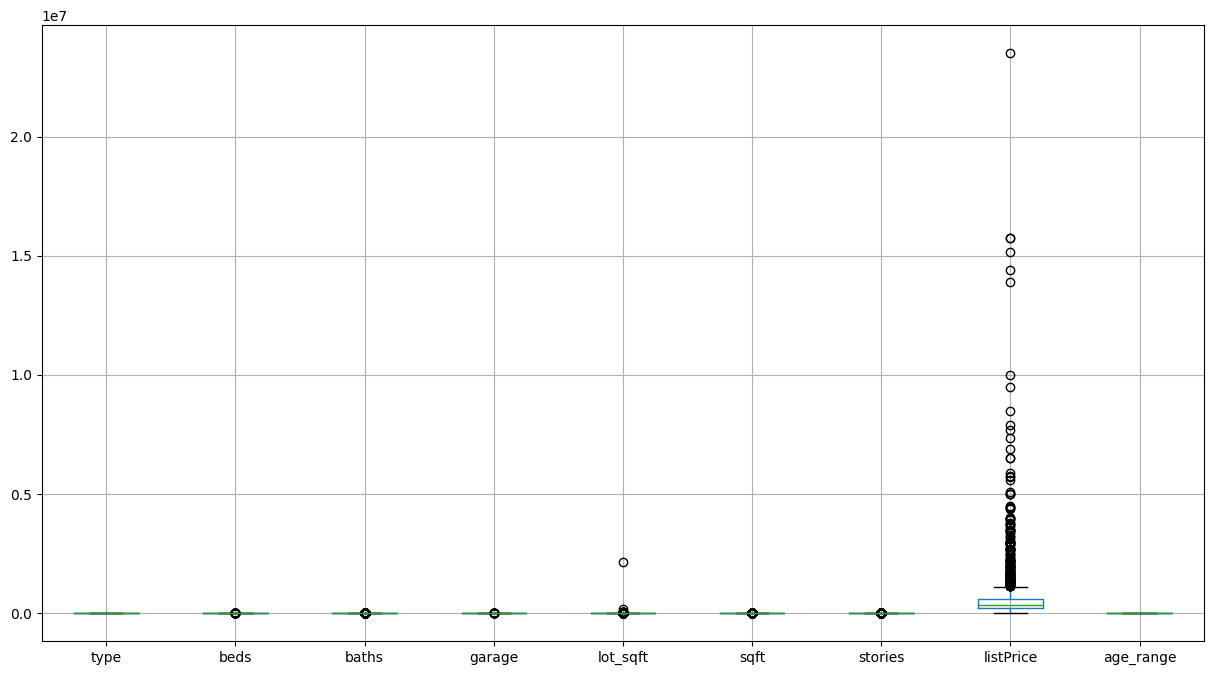

In [ ]:

df_copy = data.copy()

plt.figure(figsize = (15, 8))
df_copy.boxplot()

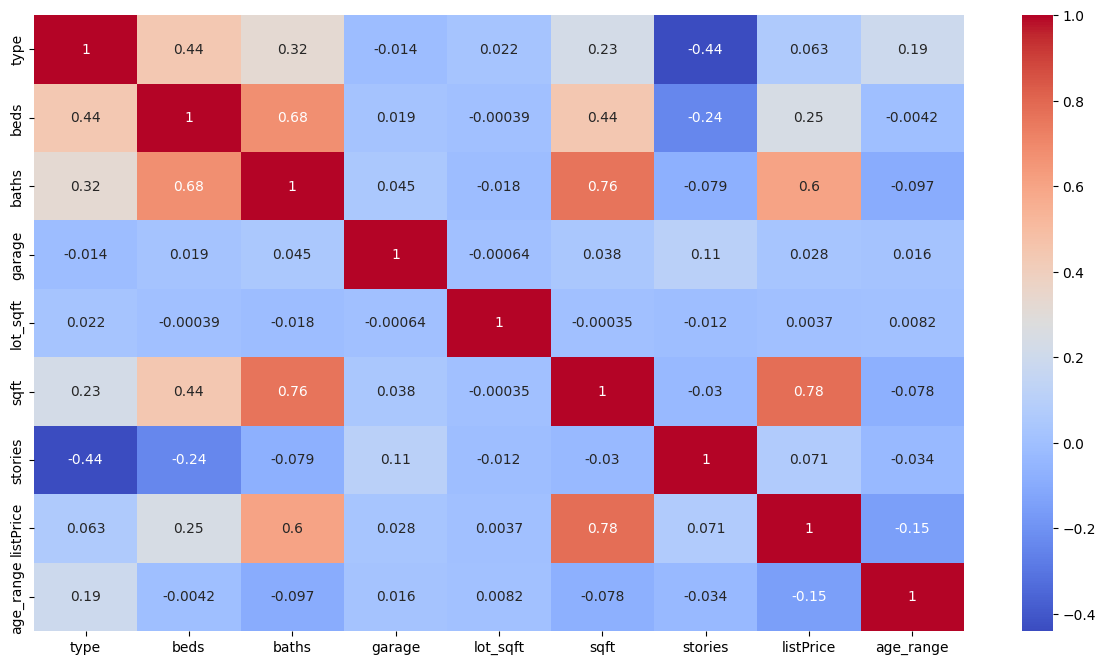

In [ ]:
corr_matrix = data.corr()  # Calculate correlation matrix

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a heatmap from the correlation matrix with annotations and a color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

###### Explanation of Correlation

This is a correlation matrix for a set of variables in a DataFrame. The values represent the correlation coefficients between pairs of variables, indicating the strength and direction of their linear relationship. The values range from -1 to 1, where:

- **1** means a perfect positive correlation (as one variable increases, the other also increases).
- **-1** means a perfect negative correlation (as one variable increases, the other decreases).
- **0** means no linear correlation between the variables.

Let's break down the key relationships in this matrix:

### 1. **`beds` and `baths` (0.441)**:
   - A moderate positive correlation. This suggests that as the number of beds in a property increases, the number of bathrooms tends to increase as well, though not perfectly.

### 2. **`beds` and `garage` (0.019)**:
   - A very weak positive correlation, close to 0. This suggests there's almost no linear relationship between the number of beds and the presence or size of a garage.

### 3. **`sqft` and `baths` (0.763)**:
   - A strong positive correlation. Larger properties (by square footage) tend to have more bathrooms, which makes sense in terms of typical property design.

### 4. **`listPrice` and `sqft` (0.777)**:
   - A strong positive correlation. Larger properties are priced higher, which is expected, as square footage directly impacts property value.

### 5. **`age` and `listPrice` (-0.109)**:
   - A weak negative correlation. Older properties tend to have slightly lower prices, although the correlation is weak, suggesting other factors (such as location or condition) also play significant roles in pricing.

### 6. **`stories` and `sqft` (-0.0297)**:
   - A very weak negative correlation. The number of stories in a property is almost independent of its square footage, indicating that properties with more stories may or may not have more square footage.

### 7. **`lot_sqft` and `sqft` (-0.000286)**:
   - A very weak negative correlation. The lot size and the property's actual square footage are almost unrelated in this case, suggesting that properties with larger lots do not necessarily have larger structures.

### 8. **`age` and `stories` (-0.237)**:
   - A moderate negative correlation. Older properties tend to have fewer stories, possibly because multi-story designs became more common in newer developments.

### 9. **`garage` and `stories` (0.105)**:
   - A weak positive correlation. There’s a small tendency for properties with more stories to also have a garage, though it's not a strong relationship.

### 10. **`baths` and `age` (0.076)**:
   - A weak positive correlation. Older properties tend to have slightly fewer bathrooms, but this relationship is weak and not significant.

### Summary of Key Points:
- **Strong correlations**: Square footage (`sqft`) is strongly correlated with both bathrooms (`baths`) and list price (`listPrice`).
- **Moderate correlations**: Beds (`beds`) and bathrooms (`baths`) are moderately correlated. Similarly, age (`age`) and stories (`stories`) have a moderate negative correlation.
- **Weak correlations**: There are several weak or near-zero correlations, such as between garage and number of beds, or between lot size (`lot_sqft`) and square footage.

In essence, this matrix shows how various features (e.g., number of bedrooms, bathrooms, square footage, and price) relate to one another. Strong positive correlations are expected between square footage and price, while weak or insignificant correlations are found in areas like garage size and age of property.

##### Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['listPrice'], axis = 1)
y = data['listPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

##### Scaling

###### Robust Scaling

In [ ]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

###### MinMax Scaling

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

###### Standard Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#### Model Building

##### Multi Layered Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Creating (MLP) Regressor
model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
# Training the model
model.fit(X_train, y_train)

print("Train set prediction: -")

# Making prediction
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()

print("Test set prediction: -")

# Making prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Train set prediction: -
Mean Squared Error: 461211181548.64813
Mean Absolute Error: 301787.8937371604
R-squared: 0.6569309144613396

Test set prediction: -
Mean Squared Error: 647151323409.6898
Mean Absolute Error: 325418.1052423491
R-squared: 0.6756836562229772


##### Linear Regression

In [ ]:
# general LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

print("Train set prediction: -")

# Making prediction
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()

print("Test set prediction: -")

# Making prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Train set prediction: -
Mean Squared Error: 476462459372.4514
Mean Absolute Error: 352332.98631663737
R-squared: 0.6455863457569566

Test set prediction: -
Mean Squared Error: 797515500501.0056
Mean Absolute Error: 387052.202584698
R-squared: 0.6003294718378447


In [ ]:
# # hyperparameter tuning with RandomizedSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import RandomizedSearchCV
# model = LinearRegression()

# # model.get_params()

# param_space = {'copy_X': [True,False],
#                'fit_intercept': [True,False],
#                'n_jobs': [1,5,10,15,None],
#                'positive': [True,False]}

# random_search = RandomizedSearchCV(model, param_space, n_iter=100, cv=5)
# random_search.fit(X_train, y_train)

# # Parameter which gives the best results
# print(f"Best Hyperparameters: {random_search.best_params_}")

# # Accuracy of the model after using best parameters
# print(f"Best Score: {random_search.best_score_}")

##### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = Ridge(alpha=1.0, random_state=42)
model.fit(X_train, y_train)

print("Train set prediction: -")

# Making prediction
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()

print("Test set prediction: -")

# Making prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Train set prediction: -
Mean Squared Error: 476462480708.697
Mean Absolute Error: 352322.0040809062
R-squared: 0.6455863298861222

Test set prediction: -
Mean Squared Error: 797519726951.0482
Mean Absolute Error: 387037.24896120484
R-squared: 0.6003273537755378


In [ ]:
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import RandomizedSearchCV
# model = Ridge()
# # model.get_params()

# param_space = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
#                'copy_X': [True, False],
#                'fit_intercept': [True, False],
#                'max_iter': [None],
#                'positive': [True, False],
#                'random_state': [42,0,1,2,26],
#                'solver': ['auto'],
#                'tol': [0.0001]}

# random_search = RandomizedSearchCV(model, param_space, n_iter=100, cv=5)
# random_search.fit(X_train, y_train)

# # Parameter which gives the best results
# print(f"Best Hyperparameters: {random_search.best_params_}")

# # Accuracy of the model after using best parameters
# print(f"Best Score: {random_search.best_score_}")

##### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = Lasso(alpha=1.0, random_state=26)
model.fit(X_train, y_train)

print("Train set prediction: -")

# Making prediction
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()

print("Test set prediction: -")

# Making prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Train set prediction: -
Mean Squared Error: 476462459376.3487
Mean Absolute Error: 352332.75274316483
R-squared: 0.6455863457540576

Test set prediction: -
Mean Squared Error: 797515696652.4094
Mean Absolute Error: 387051.96577556623
R-squared: 0.6003293735376423


In [ ]:
# from sklearn.linear_model import Lasso
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import RandomizedSearchCV
# model = Lasso()

# # model.get_params()

# param_space = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
#                'copy_X': [True, False],
#                'fit_intercept': [True, False],
#                'max_iter': [1000],
#                'positive': [True, False],
#                'random_state': [0,42,1],
#               #  'solver': ['auto', 'cyclic'],
#                'tol': [0.0001],
#                'warm_start': [True, False]}

# random_search = RandomizedSearchCV(model, param_space, cv=5)
# random_search.fit(X_train, y_train)

# # Parameter which gives the best results
# print(f"Best Hyperparameters: {random_search.best_params_}")

# # Accuracy of the model after using best parameters
# print(f"Best Score: {random_search.best_score_}")

##### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = SVR(kernel='linear', C=1.0, epsilon=0.2)
model.fit(X_train, y_train)

print("Train set prediction: -")

# Making prediction
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()

print("Test set prediction: -")

# Making prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Train set prediction: -
Mean Squared Error: 722728940370.2452
Mean Absolute Error: 299426.6286578277
R-squared: 0.46240254663255154

Test set prediction: -
Mean Squared Error: 1255257193447.8655
Mean Absolute Error: 329645.39009640407
R-squared: 0.3709347277018592


In [ ]:
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import RandomizedSearchCV
# model = SVR()

# # model.get_params()

# param_space = {
#     'C': [0.1, 1.0, 10.0],  # Regularization parameter
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types to consider
#     'degree': [2, 3, 4],  # Degree of the polynomial kernel function (used with 'poly' kernel)
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1.0],  # Kernel coefficient
#     'coef0': [0.0, 0.5, 1.0],  # Independent term in kernel function (for 'poly' and 'sigmoid')
#     'epsilon': [0.01, 0.1, 0.2],  # Epsilon in the epsilon-SVR model
#     'shrinking': [True, False],  # Whether to use the shrinking heuristic
#     'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criterion
#     # 'max_iter': [-1]  # No limit on iterations
# }


# random_search = RandomizedSearchCV(model, param_space, cv=3)
# random_search.fit(X_train, y_train)

# # Parameter which gives the best results
# print(f"Best Hyperparameters: {random_search.best_params_}")

# # Accuracy of the model after using best parameters
# print(f"Best Score: {random_search.best_score_}")

##### K-Nearest Neighbors(KNN)

In [ ]:
from sklearn.neighbours import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
print("Train set prediction: -")
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()
print("Test set prediction: -")
y_pred  = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

print("Train set prediction: -")

# Making prediction
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()

print("Test set prediction: -")

# Making prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Train set prediction: -
Mean Squared Error: 405706948109.2601
Mean Absolute Error: 235583.54075382807
R-squared: 0.6982173952999804

Test set prediction: -
Mean Squared Error: 663988673582.0869
Mean Absolute Error: 293729.21533333336
R-squared: 0.6672457103372538


In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import RandomizedSearchCV
# model = KNeighborsRegressor()

# # model.get_params()

# param_space = {
#     'n_neighbors': [3, 5, 7, 10, 15],  # Try different numbers of neighbors
#     'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
#     'metric': ['euclidean', 'manhattan', 'minkowski'],  # Metrics to test
#     'p': [1, 2],  # Power parameter for Minkowski metric
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm choices
#     'leaf_size': [10, 30, 50],  # Leaf size for tree-based algorithms
# }


# random_search = RandomizedSearchCV(model, param_space, cv=5)
# random_search.fit(X_train, y_train)

# # Parameter which gives the best results
# print(f"Best Hyperparameters: {random_search.best_params_}")

# # Accuracy of the model after using best parameters
# print(f"Best Score: {random_search.best_score_}")

##### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = RandomForestRegressor(n_estimators=600,
                                bootstrap=True,
                                max_depth=15,
                                max_features=None,
                                min_samples_leaf=2,
                                min_samples_split=2,
                                random_state=0)

model.fit(X_train, y_train)

print("Train set prediction: -")

# Making prediction
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()

print("Test set prediction: -")

# Making prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Train set prediction: -
Mean Squared Error: 156819196538.24628
Mean Absolute Error: 144714.21965159342
R-squared: 0.8833510103318931

Test set prediction: -
Mean Squared Error: 421198499792.35455
Mean Absolute Error: 244998.35709665914
R-squared: 0.7889186771073855


###### Feature Importance

In [ ]:
for importance, name in sorted(zip(model.feature_importances_, X_train.columns), reverse=True):
    print(name, importance)

sqft 0.7437804713395362
baths 0.11708015782073858
lot_sqft 0.05026430819182093
stories 0.02712209512666684
age_range 0.02408883489964033
beds 0.01863979584129895
garage 0.010845872810804359
type 0.008178463969493848


In [ ]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
# print("Cross-Validation R² Scores:", cv_scores)
# print("Mean CV R²:", cv_scores.mean())


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import RandomizedSearchCV
# model = RandomForestRegressor()

# # model.get_params()

# param_space = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [10, 20, 30, None],
#     'max_features': ['sqrt', 'log2', None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'random_state': [0,42,50,1,2,72,26,100,1998,1997,2001,1980,2025]
# }

# random_search = RandomizedSearchCV(model, param_space, cv=10, n_jobs=-1)
# random_search.fit(X_train, y_train)

# # Parameter which gives the best results
# print(f"Best Hyperparameters: {random_search.best_params_}")

# # Accuracy of the model after using best parameters
# print(f"Best Score: {random_search.best_score_}")

##### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = DecisionTreeRegressor(criterion='squared_error',
                              splitter='best',
                              max_depth=25,
                              max_features=None,
                              min_samples_leaf=2,
                              min_samples_split=2,
                              min_impurity_decrease=0.02,
                              random_state=8630)

model.fit(X_train, y_train)

print("Train set prediction: -")

# Making prediction
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()

print("Test set prediction: -")

# Making prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}") #0.8242290105848965

Train set prediction: -
Mean Squared Error: 126103789193.75394
Mean Absolute Error: 118797.13987744684
R-squared: 0.9061984761592388

Test set prediction: -
Mean Squared Error: 350739118138.7572
Mean Absolute Error: 251537.22865079364
R-squared: 0.8242290105890313


###### Feature Importance

In [ ]:
for importance, name in sorted(zip(model.feature_importances_, X_train.columns), reverse=True):
    print(name, importance)

sqft 0.7683612597448756
baths 0.09410671673679696
lot_sqft 0.03896588961248268
garage 0.03198833227450872
age_range 0.026161950566824063
type 0.017935371833616983
stories 0.015118973493662074
beds 0.00736150573723298


In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import RandomizedSearchCV
# model = DecisionTreeRegressor()

# # model.get_params()

# param_space = {
#     'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#     'splitter':['best', 'random'],
#     'max_depth': [10, 20, 25, 30, None],
#     'max_features': ['sqrt', 'log2', None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'min_impurity_decrease':[0.02,0.04],
#     'random_state':[8630,42,1100]
# }

# random_search = RandomizedSearchCV(model, param_space, cv=10, n_jobs=-1)
# random_search.fit(X_train, y_train)

# # Parameter which gives the best results
# print(f"Best Hyperparameters: {random_search.best_params_}")

# # Accuracy of the model after using best parameters
# print(f"Best Score: {random_search.best_score_}")

##### XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = XGBRegressor(max_depth=8, n_estimators=250, random_state=8030, learning_rate=0.08, n_jobs=5)
model.fit(X_train, y_train)

print("Train set prediction: -")

# Making prediction
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print()

print("Test set prediction: -")

# Making prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Train set prediction: -
Mean Squared Error: 23996836000.67734
Mean Absolute Error: 67001.59268601848
R-squared: 0.9821501019230923

Test set prediction: -
Mean Squared Error: 653188419822.849
Mean Absolute Error: 272456.2630208333
R-squared: 0.6726581983973959


In [ ]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
# print("Cross-Validation R² Scores:", cv_scores)
# print("Mean CV R²:", cv_scores.mean())

In [ ]:
# !pip install --upgrade xgboost scikit-learn
# !pip show xgboost scikit-learn
# !pip install scikit-learn==1.1.3

In [ ]:
# import pandas as pd
# import numpy as np
# data = pd.read_csv('/content/data_RealEstateDataChicago.csv')

# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import RandomizedSearchCV
# model = XGBRegressor()

# param_space = {
#     'n_estimators': [100, 200, 500],           # Number of boosting rounds
#     'max_depth': [3, 6, 10, None],             # Maximum depth of trees
#     'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
#     'subsample': [0.6, 0.8, 1.0],              # Subsample ratio of the training data
#     'colsample_bytree': [0.6, 0.8, 1.0],       # Subsample ratio of columns when constructing each tree
#     'gamma': [0, 1, 5],                        # Minimum loss reduction required to make a split
#     'min_child_weight': [1, 3, 5],             # Minimum sum of instance weights needed in a child
#     'reg_alpha': [0, 0.1, 1],                  # L1 regularization term on weights
#     'reg_lambda': [1, 1.5, 2],                 # L2 regularization term on weights
#     'scale_pos_weight': [1, 2, 5],             # Balancing positive and negative weights
#     'tree_method': ['auto', 'exact', 'hist'],  # Tree construction algorithms
#     'booster': ['gbtree', 'gblinear', 'dart'], # Booster type
#     'random_state': [0,42,1,26,72]
#     }



# random_search = RandomizedSearchCV(model, param_space, cv=5)
# random_search.fit(X_train, y_train)

# # Parameter which gives the best results
# print(f"Best Hyperparameters: {random_search.best_params_}")

# # Accuracy of the model after using best parameters
# print(f"Best Score: {random_search.best_score_}")

#### Result:

### **Model Performance Comparison**
1. **Random Forest Regression**
   - Train R-squared: **0.883**
   - Test R-squared: **0.789** — highest among all models.
   - Test Mean Squared Error: **421198499792.35455**
   - Test Mean Absolute Error: **244998.35709665914** — relatively lower compared to other models.

2. **XGBoost**
   - Train R-squared: **0.982**
   - Test R-squared: **0.672** — lower than Random Forest but competitive.
   - Test Mean Squared Error: **653188419822.849**
   - Test Mean Absolute Error: **272456.2630208333**

### Conclusion
**Random Forest Regression** is the best model here, as it provides a well-balanced performance between training and testing, along with the best test R-squared, the lowest test MSE, and a competitive MAE. **XGBoost** is overfitted due to its significantly high train R-squared.

##### All ML Models together

In [ ]:
# # Models
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# from sklearn.ensemble import AdaBoostRegressor

# # Evaluation
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# models = dict()
# models['Linear Regression'] = LinearRegression()
# models['Random Forest'] = RandomForestRegressor(n_estimators=550, bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=0)
# models['Support Vector Machine'] = SVR(kernel='rbf', gamma='scale')
# models['k-Nearest Neighbors'] = KNeighborsRegressor()
# models['XGBoost'] = XGBRegressor(max_depth=8, n_estimators=250, random_state=42, learning_rate=0.08, n_jobs=5)
# models['AdaBoost'] = AdaBoostRegressor(learning_rate=0.08, n_estimators=250, random_state=2022)


In [ ]:
# for model in models:

#     models[model].fit(X_train, y_train)
#     print(model + " model fitting completed.")

In [ ]:
# print("Test Set Prediction:\n")

# for x in models:
#     print('-'*20+x+'-'*20)
#     model = models[x]
#     y_pred = model.predict(X_test)

#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     print(f"Mean Squared Error: {mse}")
#     print(f"Mean Absolute Error: {mae}")
#     print(f"R-squared: {r2}")

In [ ]:
# print('Summary of R-squared Score: -\n')
# for i in models:
#     model = models[i]
#     y_pred = model.predict(X_test)  # Get predictions
#     r2 = r2_score(y_test, y_pred)   # Calculate R-squared
#     print(i + ' Model: ', round(r2, 4))  # Print R-squared using the built-in round function